### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


#1. Análise do faturamento


Text(0, 0.5, 'Valor')

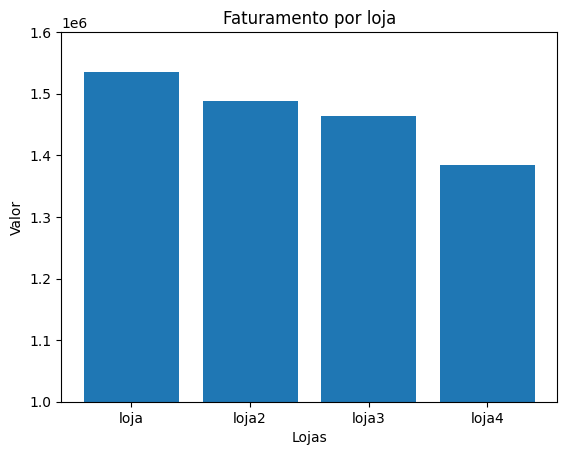

In [6]:
faturamento_Loja = round(sum(loja['Preço']),1)
faturamento_Loja2 = sum(loja2['Preço'])
faturamento_Loja3 = sum(loja3['Preço'])
faturamento_Loja4 = sum(loja4['Preço'])


lojas = ["loja","loja2","loja3","loja4"]
faturamentos = [faturamento_Loja,faturamento_Loja2,faturamento_Loja3,faturamento_Loja4]
plt.bar(x=lojas,height=faturamentos)
plt.title("Faturamento por loja")
plt.ylim(1000000, 1600000)
plt.xlabel("Lojas")
plt.ylabel("Valor")


# 2. Vendas por Categoria


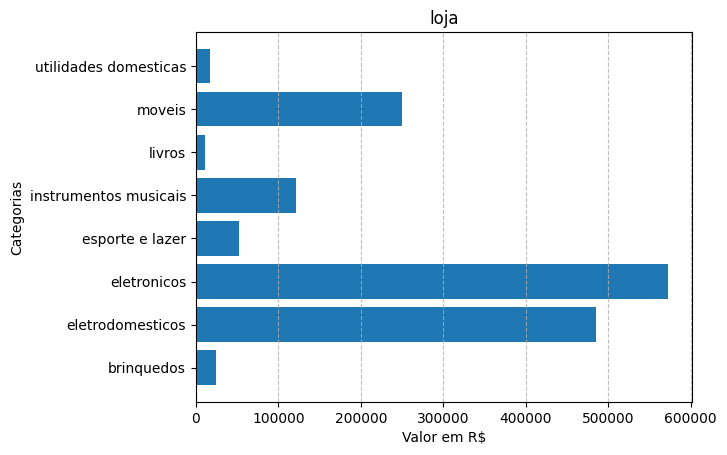

<Figure size 640x480 with 0 Axes>

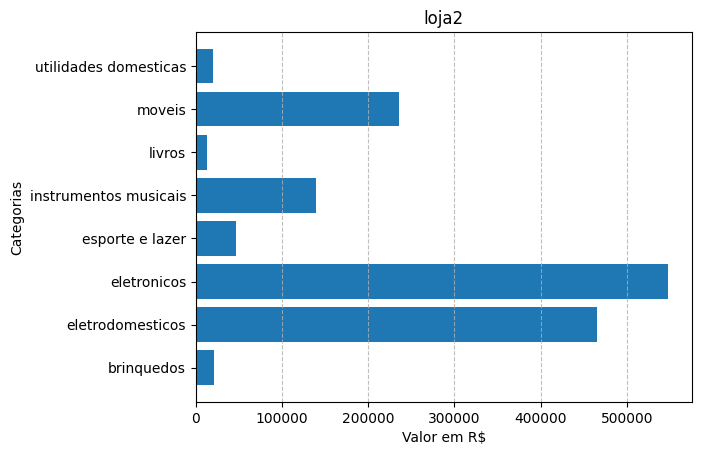

<Figure size 640x480 with 0 Axes>

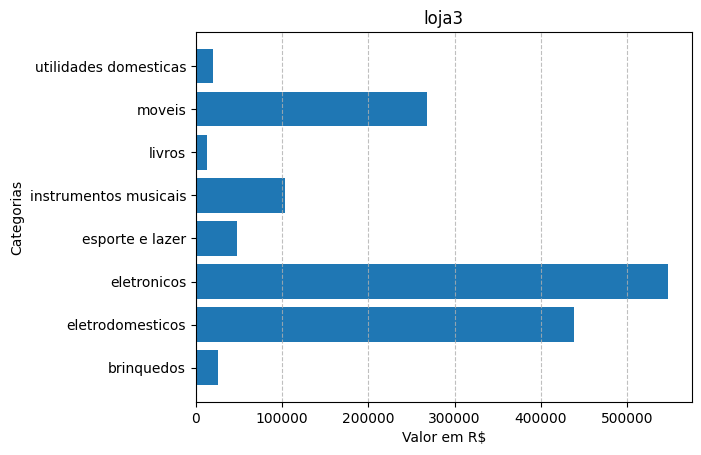

<Figure size 640x480 with 0 Axes>

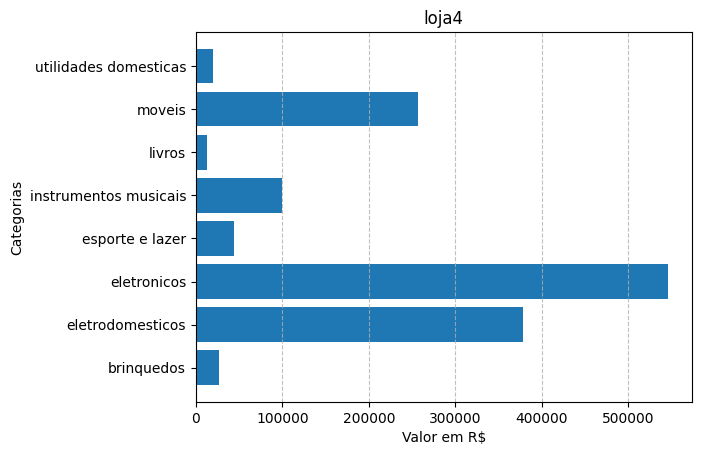

<Figure size 640x480 with 0 Axes>

loja : Mais vendido = eletronicos Menos vendido = livros
loja2 : Mais vendido = eletronicos Menos vendido = livros
loja3 : Mais vendido = eletronicos Menos vendido = livros
loja4 : Mais vendido = eletronicos Menos vendido = livros


In [ ]:
produtosMaisVendidosLoja = loja.groupby(['Categoria do Produto'])['Preço'].sum().sort_values(ascending=False)
produtosMaisVendidosLoja2 = loja2.groupby(['Categoria do Produto'])['Preço'].sum().sort_values(ascending=False)
produtosMaisVendidosLoja3 = loja3.groupby(['Categoria do Produto'])['Preço'].sum().sort_values(ascending=False)
produtosMaisVendidosLoja4 = loja4.groupby(['Categoria do Produto'])['Preço'].sum().sort_values(ascending=False)
def plotarCategorias(loja_atual,titulo):
  categorias = loja_atual["Categoria do Produto"]
  preços = loja_atual.groupby(['Categoria do Produto'])['Preço'].sum()
  labels = list(preços.index)
  valores = list(map(float,preços.values))
  valores_formatados = [round(valor,2) for valor in valores]
  plt.barh(y=labels,width = valores_formatados)
  plt.ylabel("Categorias")
  plt.xlabel("Valor em R$")
  plt.grid(axis='x', linestyle='--', alpha=0.8)
  plt.title(titulo)
  plt.figure()
  plt.show()
plotarCategorias(loja,"loja")
plotarCategorias(loja2,"loja2")
plotarCategorias(loja3,"loja3")
plotarCategorias(loja4,"loja4")

print(f"loja : Mais vendido = {loja.groupby(['Categoria do Produto'])['Preço'].sum().idxmax()} Menos vendido = {loja.groupby(['Categoria do Produto'])['Preço'].sum().idxmin()}")
print(f"loja2 : Mais vendido = {loja2.groupby(['Categoria do Produto'])['Preço'].sum().idxmax()} Menos vendido = {loja2.groupby(['Categoria do Produto'])['Preço'].sum().idxmin()}")
print(f"loja3 : Mais vendido = {loja3.groupby(['Categoria do Produto'])['Preço'].sum().idxmax()} Menos vendido = {loja3.groupby(['Categoria do Produto'])['Preço'].sum().idxmin()}")
print(f"loja4 : Mais vendido = {loja4.groupby(['Categoria do Produto'])['Preço'].sum().idxmax()} Menos vendido = {loja4.groupby(['Categoria do Produto'])['Preço'].sum().idxmin()}")

# 3. Média de Avaliação das Lojas

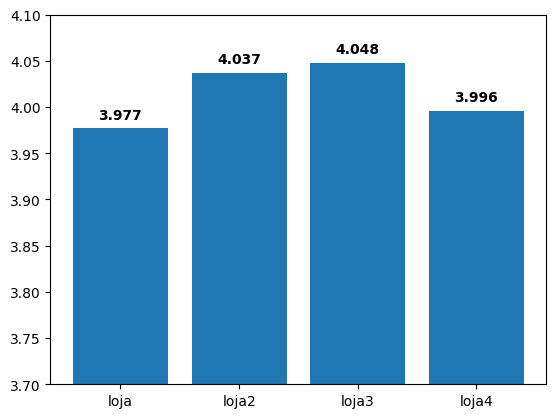

3.977 4.037 4.048 3.996


In [ ]:
mediaAvaliacaoLoja = round(float(loja['Avaliação da compra'].mean()),3)
mediaAvaliacaoLoja2 = round(float(loja2['Avaliação da compra'].mean()),3)
mediaAvaliacaoLoja3 = round(float(loja3['Avaliação da compra'].mean()),3)
mediaAvaliacaoLoja4 = round(float(loja4['Avaliação da compra'].mean()),3)
avaliacoes = [mediaAvaliacaoLoja,mediaAvaliacaoLoja2,mediaAvaliacaoLoja3,mediaAvaliacaoLoja4]
lojas = ["loja","loja2","loja3","loja4"]
plt.bar(x=lojas,height=avaliacoes)
plt.ylim(3.7, 4.1)
for i, v in enumerate(avaliacoes):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

print(mediaAvaliacaoLoja,mediaAvaliacaoLoja2,mediaAvaliacaoLoja3,mediaAvaliacaoLoja4)

# 4. Produtos Mais e Menos Vendidos

In [42]:
produtoMaisVendidoLoja =  loja.groupby("Produto").size().idxmax()
produtoMaisVendidoLoja2 = loja2.groupby("Produto").size().idxmax()
produtoMaisVendidoLoja3 = loja3.groupby("Produto").size().idxmax()
produtoMaisVendidoLoja4 = loja4.groupby("Produto").size().idxmax()

produtoMenosVendidoLoja =  loja.groupby("Produto").size().idxmin()
produtoMenosVendidoLoja2 = loja2.groupby("Produto").size().idxmin()
produtoMenosVendidoLoja3 = loja3.groupby("Produto").size().idxmin()
produtoMenosVendidoLoja4 = loja4.groupby("Produto").size().idxmin()
print("Mais vendidos:")
print("loja: " + produtoMaisVendidoLoja,"loja2: " + produtoMaisVendidoLoja2,"loja3: " + produtoMaisVendidoLoja3,"loja4: " + produtoMaisVendidoLoja4)

print("Menos vendidos")
print("loja: " + produtoMenosVendidoLoja,"loja2: " + produtoMenosVendidoLoja2,"loja3: " + produtoMenosVendidoLoja3,"loja4: " + produtoMenosVendidoLoja4)

Mais vendidos:
loja: Guarda roupas loja2: Iniciando em programação loja3: Kit banquetas loja4: Cama box
Menos vendidos
loja: Celular ABXY loja2: Jogo de tabuleiro loja3: Blocos de montar loja4: Guitarra


# 5. Frete Médio por Loja


In [ ]:
freteMedioLoja = round(float(loja['Frete'].mean()),3)
freteMedioLoja2 = round(float(loja2['Frete'].mean()),3)
freteMedioLoja3 = round(float(loja3['Frete'].mean()),3)
freteMedioLoja4 = round(float(loja4['Frete'].mean()),3)

print(freteMedioLoja,freteMedioLoja2,freteMedioLoja3,freteMedioLoja4)

34.692 33.622 33.074 31.279


O Objetivo desta análise é o de verificar a partir de ferramentas de análise de dados qual das 4 lojas principais é a que possui o menor retorno para a empresa utilizando algumas métricas como : Valor do frete, Média da avaliação dos clientes e o faturamento total de cada uma das lojas.

Levando em conta todas as informações é possível afirmar que a Loja4, por possuir o menor faturamento dentre as 4 e a segunda pior avaliação pelos clientes é a que possui o menor retorno financeiro e social dentre as lojas analisadas apesar de possuir o menor valor de frete entre elas.